In [7]:
import pandas as pd
import urllib
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

In [8]:
data = pd.read_csv('/Users/beautifulmonster/Desktop/newzy.csv', sep ='|')
data.head()

,doc_id,doc_source,doc_title,doc_content,doc_date,doc_url
0,39,Google News,"50 Years on, Finding Profit in 'Truth' on JFK ...","Washington Post50 Years on, Finding Profit in ...",11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...
1,38,Google News,"Nearly 10 years later, families and officials ...","Washington PostNearly 10 years later, families...",11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...
2,37,Google News,"Cuccinelli, running hard, has been hobbled in ...","Washington PostCuccinelli, running hard, has b...",11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...
3,36,Google News,Chuck Schumer endorses Hillary Clinton for Pre...,New York Daily NewsChuck Schumer endorses Hill...,11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...
4,35,Google News,Sec. Kerry issues apparent warning to Iran - C...,Ahram OnlineSec. Kerry issues apparent warning...,11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...


In [9]:
data.doc_source.unique()

array(['Google News', 'PowerLine', 'Reuters', 'Guardian', 'Daily Kos',
       'Drudge Report', 'Real Clear Politics', 'NPR', 'Fox',
       'New York Times', 'Breitbart', 'CNN', 'US News', 'UPI Latest',
       'Politico Magazine', nan], dtype=object)

only `Politico Magazine` and `Powerline` have complete documents.

In [10]:
data = data.loc[(data['doc_source'] == 'Politico Magazine') | (data['doc_source'] == 'PowerLine')]
data = data.reset_index(drop = True)
data.head()

,doc_id,doc_source,doc_title,doc_content,doc_date,doc_url
0,48,PowerLine,These Zins Are a Dusi,(Steven Hayward) I’ve been falling behind on m...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...
1,49,PowerLine,NY Times Editorial Board Hacked by The Onion,(John Hinderaker) At least I think it was the ...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...
2,50,PowerLine,The line Obama crossed,(Scott Johnson) Obamacare was enacted on a fou...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...
3,51,PowerLine,Sham/Wow,(Scott Johnson) It’s unfair to compare and con...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...
4,52,PowerLine,A Quarterback Controversy With a Political Twist?,(John Hinderaker) Public Policy Polling ran a ...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...


In [11]:
# creat column 'author' from doc_content
data['author'] = data.doc_content.apply(lambda x: str(x).split(')')[0].strip('('))
data.head()

,doc_id,doc_source,doc_title,doc_content,doc_date,doc_url,author
0,48,PowerLine,These Zins Are a Dusi,(Steven Hayward) I’ve been falling behind on m...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,Steven Hayward
1,49,PowerLine,NY Times Editorial Board Hacked by The Onion,(John Hinderaker) At least I think it was the ...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,John Hinderaker
2,50,PowerLine,The line Obama crossed,(Scott Johnson) Obamacare was enacted on a fou...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,Scott Johnson
3,51,PowerLine,Sham/Wow,(Scott Johnson) It’s unfair to compare and con...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,Scott Johnson
4,52,PowerLine,A Quarterback Controversy With a Political Twist?,(John Hinderaker) Public Policy Polling ran a ...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,John Hinderaker


In [ ]:
data.doc_content = data.doc_content.apply(lambda x: str(x).strip(str(x).split(')')[0]).strip(')'))
data.head()

,doc_id,doc_source,doc_title,doc_content,doc_date,doc_url,author
0,48,PowerLine,These Zins Are a Dusi,I’ve been falling behind on many regular feat...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,Steven Hayward
1,49,PowerLine,NY Times Editorial Board Hacked by The Onion,"At least I think it was the Onion. Someone, a...",11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,John Hinderaker
2,50,PowerLine,The line Obama crossed,Obamacare was enacted on a foundational set o...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,Scott Johnson
3,51,PowerLine,Sham/Wow,It’s unfair to compare and contrast Barack Ob...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,Scott Johnson
4,52,PowerLine,A Quarterback Controversy With a Political Twist?,Public Policy Polling ran a survey here in Mi...,11/03/2013,http://feeds.powerlineblog.com/~r/powerlineblo...,John Hinderaker


In [ ]:
# create news_id
# data['news_id'] = data['doc_source'].apply(lambda x: 1 if x == 'PowerLine' else 2)
# data.sample(10)

In [ ]:
#create LIB
LIB = data[['doc_id','doc_title','doc_date','doc_source','author']].set_index('doc_id')
LIB.head()

,doc_title,doc_date,doc_source,author
doc_id,,,,
48,These Zins Are a Dusi,11/03/2013,PowerLine,Steven Hayward
49,NY Times Editorial Board Hacked by The Onion,11/03/2013,PowerLine,John Hinderaker
50,The line Obama crossed,11/03/2013,PowerLine,Scott Johnson
51,Sham/Wow,11/03/2013,PowerLine,Scott Johnson
52,A Quarterback Controversy With a Political Twist?,11/03/2013,PowerLine,John Hinderaker


In [ ]:
data.doc_content[1]

' At least I think it was the Onion. Someone, anyway, got access to the Times Editorial Board computers and turned out this parody editorial on Obamacare: Congressional Republicans have stoked consumer fears and confusion with charges that the health care reform law is causing insurers to cancel existing policies and will force many people to pay substantially higher premiums next year for coverage they don’t want. That, they say, violates President Obama’s pledge that if you like the insurance you have, you can keep it. Mr. Obama clearly misspoke when he said that. HaHaHaHaHa! President Obama misspoke 27 times! And curiously enough, when he misspoke it was the centerpiece of his argument for his supposedly signature legislative achievement! Even the Times editorial board wouldn’t try to sell that one; it’s got to be the Onion. By law, insurers cannot continue to sell policies that don’t provide the minimum benefits and consumer protections required as of next year. So they’ve sent can

In [ ]:
import nltk
df = data.doc_content.apply(lambda x: pd.Series(nltk.sent_tokenize(str(x))))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
df = df.set_index(data.doc_id).stack().to_frame().rename(columns={0:'sent_str'})

In [ ]:
df.head()

sent_str
doc_id                                                     
48     0   I’ve been falling behind on many regular feat...
       1                  So here’s a quick catch up guide.
       2  Old timers of Paso Robles wines all know the D...
       3  The Dusi family’s Zinfandel vineyards go back ...
       4  For decades, if you wanted to find the best Zi...

In [ ]:
df = df.sent_str.apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))

In [ ]:
df = df.stack().to_frame().rename(columns = {0:'pos_tuple'})
df

In [ ]:
df['pos'] = df.pos_tuple.apply(lambda x: x[1])
df['token_str'] = df.pos_tuple.apply(lambda x: x[0])

In [ ]:
df.index.names = ['doc_id','sent_num','token_num']

In [ ]:
df

In [ ]:
TOKEN = df.copy()
TOKEN

In [89]:
TOKEN['term_str'] = TOKEN['token_str'].str.lower().str.replace('[\W_]', '')

In [56]:
TOKEN = TOKEN[~TOKEN.term_str.isna()]

In [102]:
TOKEN.term_str = TOKEN.term_str.replace('',np.NaN)
TOKEN = TOKEN[~TOKEN.term_str.isna()]
TOKEN

pos_tuple  pos   token_str    term_str
doc_id  sent_num token_num                                                
48      0        0                   (I, PRP)  PRP           I           i
                 2                   (ve, RB)   RB          ve          ve
                 3                (been, VBN)  VBN        been        been
                 4             (falling, VBG)  VBG     falling     falling
                 5               (behind, IN)   IN      behind      behind
...                                       ...  ...         ...         ...
1026333 17       19             (people, NNS)  NNS      people      people
                 20         (represents, VBZ)  VBZ  represents  represents
                 21                   (a, DT)   DT           a           a
                 22                 (new, JJ)   JJ         new         new
                 23                 (low, JJ)   JJ         low         low

[4669302 rows x 4 columns]

In [103]:
VOCAB = TOKEN.term_str.value_counts().to_frame()\
    .rename(columns={'index':'term_str', 'term_str':'n'})\
    .sort_index().reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'

In [104]:
VOCAB['num'] = VOCAB.term_str.str.match("\d+").astype('int')


In [105]:
VOCAB

,term_str,n,num
term_id,,,
0,0,28,1
1,00,6,1
2,000,4,1
3,000000,1,1
4,00000001,1,1
...,...,...,...
80425,گر,1,0
80426,گروههای,1,0
80427,گزارش,1,0


In [106]:
VOCAB.to_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/VOCAB.csv') 

### Annotate(VOCAB)

#### Add Stopwords

In [107]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [108]:
sw.sample(10)

,dummy
term_str,
but,1
over,1
couldn't,1
you've,1
does,1
can,1
again,1
they,1
should,1


In [109]:
VOCAB['stop'] = VOCAB.term_str.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [110]:
VOCAB[VOCAB.stop == 1].sample(10)

,term_str,n,num,stop
term_id,,,,
77204,was,29780,0,1
13098,can,10551,0,1
33490,her,9118,0,1
9804,below,1748,0,1
34039,his,22573,0,1
19177,d,1146,0,1
77245,wasn,1144,0,1
38977,just,6461,0,1
3984,about,15692,0,1


#### Add Stems

In [111]:
from nltk.stem.porter import PorterStemmer
stemmer1 = PorterStemmer()
VOCAB['stem_porter'] = VOCAB.term_str.apply(stemmer1.stem)

from nltk.stem.snowball import SnowballStemmer
stemmer2 = SnowballStemmer("english")
VOCAB['stem_snowball'] = VOCAB.term_str.apply(stemmer2.stem)

from nltk.stem.lancaster import LancasterStemmer
stemmer3 = LancasterStemmer()
VOCAB['stem_lancaster'] = VOCAB.term_str.apply(stemmer3.stem)

In [112]:
VOCAB.sample(10)

,term_str,n,num,stop,stem_porter,stem_snowball,stem_lancaster
term_id,,,,,,,
33347,heil,3,0,0,heil,heil,heil
64644,shirked,2,0,0,shirk,shirk,shirk
43742,mariana,1,0,0,mariana,mariana,marian
32963,hath,5,0,0,hath,hath,hath
71725,threegame,2,0,0,threegam,threegam,threegame
62319,sandersbob,1,0,0,sandersbob,sandersbob,sandersbob
47324,muster,39,0,0,muster,muster,must
9076,barehanded,1,0,0,barehand,barehand,barehand
9636,begets,1,0,0,beget,beget,beget


In [113]:
TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)

In [114]:
TOKEN.head()

pos_tuple  pos token_str term_str  term_id
doc_id sent_num token_num                                                 
48     0        0                (I, PRP)  PRP         I        i    35204
                2                (ve, RB)   RB        ve       ve    76013
                3             (been, VBN)  VBN      been     been     9599
                4          (falling, VBG)  VBG   falling  falling    26831
                5            (behind, IN)   IN    behind   behind     9684

In [116]:
#DOC.to_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/DOC.csv')
LIB.to_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/LIB.csv')
VOCAB.to_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/VOCAB.csv')
TOKEN.to_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/TOKEN.csv')

## BOW, TFIDF and Vector Space

### Add MAX_POS to VOCAB
Regarding collisions when using .idxmax(), the documentation says "If multiple values equal the maximum, the first row label with that value is returned."

In [117]:
VOCAB['pos_max'] = TOKEN.groupby(['term_id', 'pos']).pos.count().unstack().idxmax(1)

In [118]:
VOCAB.sample(5)

,term_str,n,num,stop,stem_porter,stem_snowball,stem_lancaster,pos_max
term_id,,,,,,,,
44973,ment,1,0,0,ment,ment,ment,NN
13672,caspar,2,0,0,caspar,caspar,casp,NNP
10276,bigger,146,0,0,bigger,bigger,big,JJR
45389,midlevel,11,0,0,midlevel,midlevel,midlevel,JJ
44058,masterful,6,0,0,master,master,mast,JJ


#### Compare POS Stats in TOKEN and VOCAB

Pause and look at distribution of POS tags. The POS table could become part of your data model (analytical edition) if you were interested in studying POS tags.

In [119]:
POS = TOKEN.pos.value_counts().to_frame().rename(columns={'pos':'n'})
POS.index.name = 'pos_id'
POS.head()

,n
pos_id,
NN,717184
IN,579557
NNP,526984
DT,487403
JJ,346888


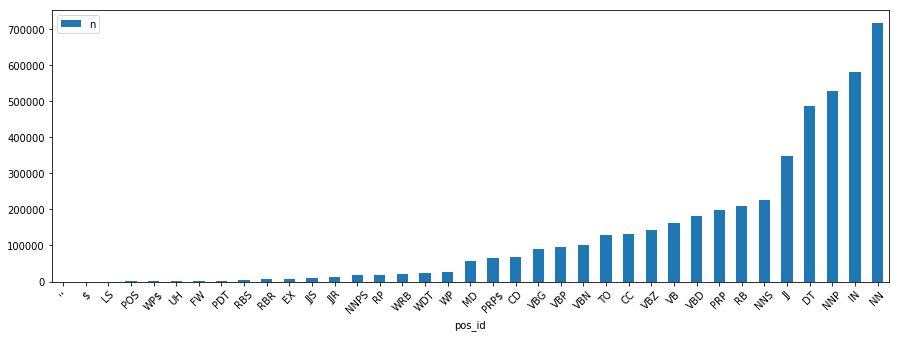

In [121]:
POS.sort_values('n').plot.bar(y='n', figsize=(15,5), rot=45);

In [132]:
TOKEN

pos_tuple  pos   token_str    term_str  \
doc_id  sent_num token_num                                                   
48      0        0                   (I, PRP)  PRP           I           i   
                 2                   (ve, RB)   RB          ve          ve   
                 3                (been, VBN)  VBN        been        been   
                 4             (falling, VBG)  VBG     falling     falling   
                 5               (behind, IN)   IN      behind      behind   
...                                       ...  ...         ...         ...   
1026333 17       19             (people, NNS)  NNS      people      people   
                 20         (represents, VBZ)  VBZ  represents  represents   
                 21                   (a, DT)   DT           a           a   
                 22                 (new, JJ)   JJ         new         new   
                 23                 (low, JJ)   JJ         low         low   

                            term_id  
doc_id  sent_num token_num           
48      0        0            35204  
                 2            76013  
                 3             9599  
                 4            26831  
                 5             9684  
...                             ...  
1026333 17       19           52831  
                 20           59944  
                 21            3769  
                 22           48179  
                 23           42675  

[4669302 rows x 5 columns]

In [5]:
TOKEN = pd.read_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/TOKEN.csv')
VOCAB = pd.read_csv('/Users/beautifulmonster/Desktop/DS5001/Final project/VOCAB.csv')

In [6]:
TOKEN

,doc_id,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id
0,48,0,0,"('I', 'PRP')",PRP,I,i,35204
1,48,0,2,"('ve', 'RB')",RB,ve,ve,76013
2,48,0,3,"('been', 'VBN')",VBN,been,been,9599
3,48,0,4,"('falling', 'VBG')",VBG,falling,falling,26831
4,48,0,5,"('behind', 'IN')",IN,behind,behind,9684
...,...,...,...,...,...,...,...,...
4669297,1026333,17,19,"('people', 'NNS')",NNS,people,people,52831
4669298,1026333,17,20,"('represents', 'VBZ')",VBZ,represents,represents,59944
4669299,1026333,17,21,"('a', 'DT')",DT,a,a,3769
4669300,1026333,17,22,"('new', 'JJ')",JJ,new,new,48179


In [1]:
def TFIDF(token_df,vocab_df, bag_type, count_type, tf_type, idf_type, item):
    
    global OHCO
    
    TOKEN = token_df
    VOCAB = vocab_df
    count_method = count_type # 'c' or 'n' # n = n tokens, c = distinct token (term) count
    tf_method = tf_type # sum, max, log, double_norm, raw, binary
    tf_norm_k = .5 # only used for double_norm
    idf_method = idf_type # standard, max, smooth
    bag = bag_type
    gradient_cmap = 'YlGnBu'
        
    VOCAB = VOCAB[~VOCAB.term_str.isna()]
    TOKEN = TOKEN[~TOKEN.term_str.isna()]
    
    #add term_id to token table
    #TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)
    TOKEN = TOKEN.join(VOCAB.stem_porter,on='term_id')
    
    BOW = TOKEN.groupby(bag+[item])[item].count().to_frame().rename(columns={item:'n'})
    
    BOW['c'] =BOW.n.astype('bool').astype('int')
    
    DTCM = BOW[count_method].unstack().fillna(0).astype('int')
        
    #compute TF
    print('TF method:', tf_method)

    if tf_method == 'sum':
        TF = DTCM.T / DTCM.T.sum()

    elif tf_method == 'max':
        TF = DTCM.T / DTCM.T.max()

    elif tf_method == 'log':
        TF = np.log10(1 + DTCM.T)
    
    elif tf_method == 'raw':
        TF = DTCM.T

    elif tf_method == 'double_norm':
        TF = DTCM.T / DTCM.T.max()
        TF = tf_norm_k + (1 - tf_norm_k) * TF[TF > 0] # EXPLAIN; may defeat purpose of norming

    elif tf_method == 'binary':
        TF = DTCM.T.astype('bool').astype('int')
    
    TF = TF.T
    
    #compute DF
    N = DTCM.shape[0]
    DF = DTCM[DTCM > 0].count()
    print('IDF method:', idf_method)

    if idf_method == 'standard':
        IDF = np.log10(N / DF)

    elif idf_method == 'max':
        IDF = np.log10(DF.max() / DF) 

    elif idf_method == 'smooth':
        IDF = np.log10((1 + N) / (1 + DF)) + 1 
        
    
    #compute TF-IDF
    TFIDF = TF * IDF
    
    
    VOCAB['df'] = DF
    VOCAB['idf'] = IDF
    BOW['tf'] = TF.stack()
    BOW['tfidf'] = TFIDF.stack()
    
    VOCAB['tfidf_sum'] = TFIDF.sum()
        

    
    return TFIDF, VOCAB, BOW
    
    

In [2]:
OHCO = ['doc_id','sent_num','toekn_num']
SENTS = OHCO[:2]
BOOKS = OHCO[:1]   

tfidf_mat, VOCAB, BOW = TFIDF(TOKEN, VOCAB,SENTS, 'n','sum','standard','term_id' )

NameError: name 'TOKEN' is not defined

In [1]:
tfidf_mat

NameError: name 'tfidf_mat' is not defined